In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [6]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import arrow
import glob
import sys
sys.path.append('../pyscripts/bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
import extract_bylayer_mean as ebm
from importlib import reload
from salishsea_tools import viz_tools

%matplotlib inline
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 13,
                     'xtick.labelsize' : 13,
                     'ytick.labelsize' : 13})

Text(0.5, 1.0, 'individual stations')

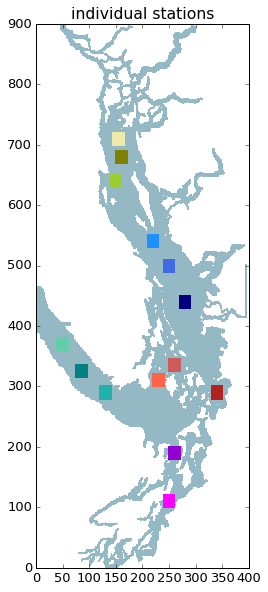

In [7]:
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'

ps_x = 250; ps_y = 110; ps_col = 'magenta'
ps2_x = 260; ps2_y = 190; ps2_col = 'darkviolet'
# ps2_x = 
w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax0.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax0.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)

rect_ps = Rectangle((ps_x-10,ps_y-10),20,20,linewidth=2,edgecolor=ps_col,facecolor=ps_col)
ax0.add_patch(rect_ps)
rect_ps = Rectangle((ps2_x-10,ps2_y-10),20,20,linewidth=2,edgecolor=ps2_col,facecolor=ps2_col)
ax0.add_patch(rect_ps)


ax0.set_title('individual stations')



## undersaturated percents are calculated in:
    KEY_OMA OmA_percent_domain_cells_undersaturated_calculator

# code for extracting OmA averages -winter/summer

In [4]:
# start ='2015-06-01'
# end ='2015-08-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)

# BR_oma_summer = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI9_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_summer[i,:,:,:] = t_Oma

# BR_oma_summer_mean = np.nanmean(BR_oma_summer,axis=0)
# pickle.dump(BR_oma_summer_mean, open("../pkls/PI9_Oma_SUMMERmean_01jun_31aug.pkl", 'wb'))
# print(np.shape(BR_oma_summer_mean))

# start ='2015-12-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_winter1 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI9_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_winter1[i,:,:,:] = t_Oma

# start ='2015-01-01'
# end ='2015-02-28'

# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array2 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array2.append(r)
# dayslen = len(arrow_array2)

# BR_oma_winter2 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array2[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI9_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_winter2[i,:,:,:] = t_Oma

# BR_oma_winter = np.concatenate((BR_oma_winter1,BR_oma_winter2),axis=0)
# print(np.shape(BR_oma_winter))
# BR_oma_winter_mean = np.nanmean(BR_oma_winter,axis=0)
# pickle.dump(BR_oma_winter_mean, open("../pkls/PI9_Oma_WINTERmean_01dec_28feb.pkl", 'wb'))




In [16]:
BR_summer_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
BR_winter_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  
PI_summer_3mon = pickle.load(open('../pkls/PI9_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
PI_winter_3mon = pickle.load(open('../pkls/PI9_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  



In [17]:
PI_12stns_mean_std_summer = np.zeros([12,40,2])
PI_12stns_mean_std_winter = np.zeros([12,40,2])
BR_12stns_mean_std_summer = np.zeros([12,40,2])
BR_12stns_mean_std_winter = np.zeros([12,40,2])


In [19]:
print(np.shape(PI_winter_3mon))

(40, 898, 398)


In [41]:
stn_xs = [jdf_x,jdf2_x,jdf3_x,cs_x,cs2_x,cs3_x,haro_x,haro2_x,haro3_x,ns_x,ns2_x,ns3_x]
stn_ys = [jdf_y,jdf2_y,jdf3_y,cs_y,cs2_y,cs3_y,haro_y,haro2_y,haro3_y,ns_y,ns2_y,ns3_y]

stn_cols = ['teal','mediumaquamarine','lightseagreen',\
            'royalblue','navy','dodgerblue',\
           'tomato','firebrick','indianred',\
           'olive','yellowgreen','palegoldenrod']

for i in range(0,12):
    
    t_stn_x = stn_xs[i]
    t_stn_y = stn_ys[i]
    
    t_test = PI_winter_3mon[:,t_stn_y-10:t_stn_y+10,t_stn_x-10:t_stn_x+10]
    t_test[t_test>1e10]= np.nan
    t_prof_mean = np.zeros(40)
    t_prof_std = np.zeros(40)
    for d in range(0,40):
        t_prof_mean[d] = np.nanmean(t_test[d,:,:])
        t_prof_std[d] = np.nanstd(t_test[d,:,:])
    PI_12stns_mean_std_winter[i,:,0] = t_prof_mean
    PI_12stns_mean_std_winter[i,:,1] = t_prof_std
    
    t_test = PI_summer_3mon[:,t_stn_y-10:t_stn_y+10,t_stn_x-10:t_stn_x+10]
    t_test[t_test>1e10]= np.nan
    t_prof_mean = np.zeros(40)
    t_prof_std = np.zeros(40)
    for d in range(0,40):
        t_prof_mean[d] = np.nanmean(t_test[d,:,:])
        t_prof_std[d] = np.nanstd(t_test[d,:,:])
    PI_12stns_mean_std_summer[i,:,0] = t_prof_mean
    PI_12stns_mean_std_summer[i,:,1] = t_prof_std
    
    t_test = BR_winter_3mon[:,t_stn_y-10:t_stn_y+10,t_stn_x-10:t_stn_x+10]
    t_test[t_test>1e10]= np.nan
    t_prof_mean = np.zeros(40)
    t_prof_std = np.zeros(40)
    for d in range(0,40):
        t_prof_mean[d] = np.nanmean(t_test[d,:,:])
        t_prof_std[d] = np.nanstd(t_test[d,:,:])
    BR_12stns_mean_std_winter[i,:,0] = t_prof_mean
    BR_12stns_mean_std_winter[i,:,1] = t_prof_std
    
    t_test = BR_summer_3mon[:,t_stn_y-10:t_stn_y+10,t_stn_x-10:t_stn_x+10]
    t_test[t_test>1e10]= np.nan
    t_prof_mean = np.zeros(40)
    t_prof_std = np.zeros(40)
    for d in range(0,40):
        t_prof_mean[d] = np.nanmean(t_test[d,:,:])
        t_prof_std[d] = np.nanstd(t_test[d,:,:])
    BR_12stns_mean_std_summer[i,:,0] = t_prof_mean
    BR_12stns_mean_std_summer[i,:,1] = t_prof_std

In [42]:
for i in range(6,7):
    
    t_stn_x = stn_xs[i]
    t_stn_y = stn_ys[i]
    
    t_test = PI_winter_3mon[:,t_stn_y-10:t_stn_y+10,t_stn_x-10:t_stn_x+10]
    t_prof_mean = np.zeros(40)
    t_prof_std = np.zeros(40)
    
    for d in range(0,40):
        print(t_test[d,:,:])
        t_prof_mean[d] = np.nanmean(t_test[d,:,:])
        print()

[[1.37209972 1.36854515 1.36710569 1.36662445 1.36683226 1.3675372
  1.36877191 1.36926342 1.36977212 1.3703002  1.37126815 1.37280167
  1.37459694 1.37602647 1.37745682 1.37867576 1.37969934 1.38024171
  1.38098299 1.38280089]
 [1.37141766 1.36854875 1.36714836 1.36668415 1.36690208 1.36755631
  1.36811808 1.36857368 1.3687911  1.36939613 1.37036598 1.37166566
  1.37325912 1.37466752 1.37606811 1.37737522 1.37831976 1.37901347
  1.37987063 1.38182625]
 [1.371529   1.36845831 1.36716991 1.36636193 1.36647255 1.36694293
  1.36764126 1.36795415 1.36819038 1.36853077 1.36928038 1.37032934
  1.37182674 1.37314449 1.37448558 1.37566437 1.37688359 1.37766562
  1.37855681 1.38062386]
 [1.37167573 1.36884369 1.36757602 1.3667059  1.36685317 1.36702553
  1.36740529 1.36766323 1.36749203 1.36770441 1.36822652 1.3690511
  1.37039172 1.37165803 1.37296471 1.37408293 1.37529324 1.37638737
  1.37712652 1.37914824]
 [1.37254625 1.36929941 1.36766671 1.36674267 1.36653043 1.36664624
  1.36689675 1.366

[[       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan 1.32755396 1.32860035
  1.32901048 1.32837366]
 [       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan 1.32726347 1.32830563
  1.32893651 1.32869877]
 [       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan 1.32714917 1.32796661
  1.32867305 1.32858338]
 [       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan 1.32760567
  1.32819625 1.32821926]
 [       nan        nan        nan        nan        nan        nan
         nan    

Text(0.5, 0.5, 'Summer')

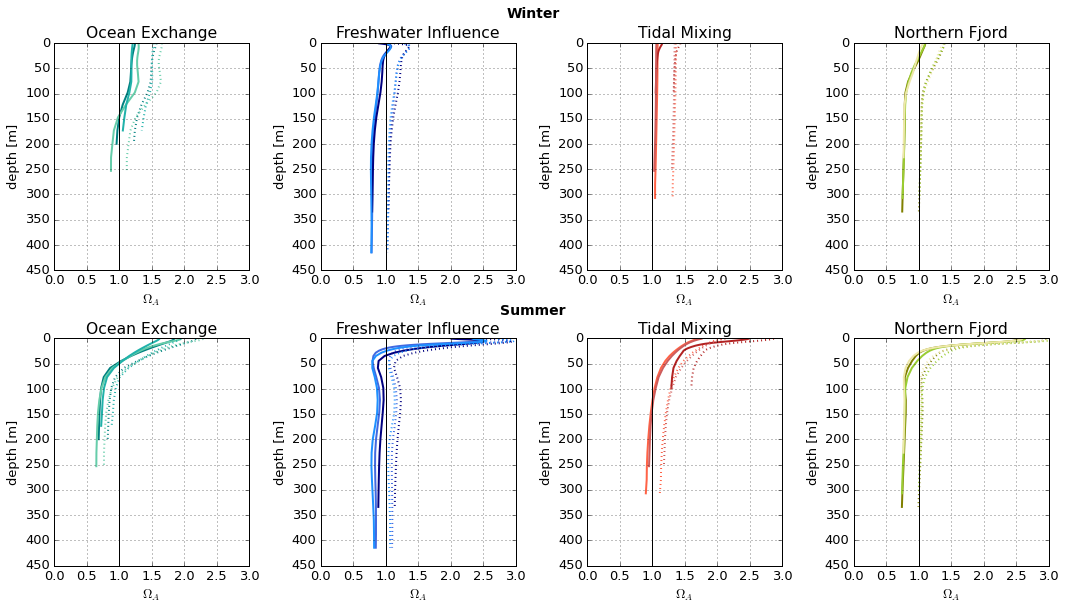

In [56]:
fact = 0.6
fs = 12
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = mesh['gdept_1d'][:]
zdepth = depths[0]

fig, axs = plt.subplots(2,4, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)



for i in range(0,3):
    axs[4].plot(BR_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[4].plot(PI_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(3,6):
    axs[5].plot(BR_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[5].plot(PI_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(6,9):
    axs[6].plot(BR_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[6].plot(PI_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(9,12):
    axs[7].plot(BR_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[7].plot(PI_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
    
    
####
for i in range(0,3):
    axs[0].plot(BR_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[0].plot(PI_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(3,6):
    axs[1].plot(BR_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[1].plot(PI_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(6,9):
    axs[2].plot(BR_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[2].plot(PI_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(9,12):
    axs[3].plot(BR_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[3].plot(PI_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(0,8):
    
    axs[i].axvline(x=1, color = 'k', linestyle = '-')
    axs[i].set_xlim([0,3])
    axs[i].set_ylim([0,450])
    axs[i].invert_yaxis()
    axs[i].set_xlabel('$\Omega_A$')
    axs[i].set_ylabel('depth [m]')
    axs[i].grid()
    
    axs[0].set_title('Ocean Exchange');axs[4].set_title('Ocean Exchange')
    axs[1].set_title('Freshwater Influence');axs[5].set_title('Freshwater Influence')
    axs[2].set_title('Tidal Mixing');axs[6].set_title('Tidal Mixing')
    axs[3].set_title('Northern Fjord');axs[7].set_title('Northern Fjord')
    
plt.tight_layout()
fig.text(0.5, 0.99, 'Winter', fontsize = fs+2, fontweight = 'bold', ha = 'center')
fig.text(0.5, 0.50, 'Summer', fontsize = fs+2, fontweight = 'bold', ha = 'center')
